{0: 3597600.8888870003, 1: 3454630.3273040005, 2: 1689677.3538329997}
[[6, 6], [6, 6], [330]]
0.7027881410310816


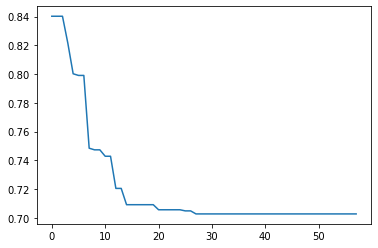

In [10]:
import csv
import heapq
import random
import math
import sys
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta
import numpy as np
import math

NEEDED_SKILL = [("Anne", 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
                ("Anne", 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1),
                ("Anne", 0,0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1)]
GROUP = [("Anne", 2),
         ("Anne", 2),
         ("Anne", 1)]   
Requirement = [[ 10000, 15000, 5000, 1000, 2000, 1000, 1000, 1000, 500, 700, 200, 200, 800, 0, 200, 300, 100,200, 100, 200, 100, 0, 100, 0, 200, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50],
                [ 5000, 10000, 5000, 1000, 1000, 2000, 1000, 1000, 1000, 500, 2000, 2000, 0, 100, 0, 0, 500, 500, 100, 200, 200, 200, 0, 100, 300, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0,50],
                [ 0,0, 0, 0, 1000, 1000, 100, 500, 1000, 1000, 0, 1000, 0, 0, 0, 200, 500, 500, 100, 100, 1, 1, 0, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50]]
# Requirement = np.zeros((3,37))
# Requirement[1][36]=100
TOTAL_GROUP = 3
TOTAL_CANDIDATE =500
TOTAL_SKILL = 37     
def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog(start):
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)


h_member = 3
generation_size = 5
list_fitness =[]
population_temp = []
Z = 0.3

## so skill chuyen vao
m_skill = 37
list_totalscore = []
with open(r"C:\Users\ACER\Downloads\Gs-master\gas\data.norm2.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        cost = 0
        count=0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if(countt == 0):
                candi.append(row)
                count = count + 1
            else:
                if(count < 3):
                    candi.append(row)
                else:
                    candi.append(float(row))
                    cost += float(row)
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
        list_totalscore.append(cost)
    population_size = round((len(population_temp)-1)*0.8)
    m = m_skill

   
start = time()
atexit.register(endlog)
log("")
Requirement=np.array(Requirement)
Requirement=Requirement.astype(np.float64)
del population_temp[0]
for i in range(0,len(population_temp)):
    del population_temp[i][0]
    del population_temp[i][1]
    del population_temp[i][0]
# for i in range(0,len(population_temp)-300):
#     population_temp.pop()
candidate_skill = np.array(population_temp)
candidate_skill = candidate_skill.astype(np.float64)
Reverse_data = np.array(population_temp)
Reverse_data = Reverse_data.transpose()
les = np.sort(Reverse_data, axis=1)
res = -np.sort(-Reverse_data, axis=1)

group_need = np.array(GROUP)
group_need = np.delete(group_need, 0, 1)
group_need = group_need.transpose()
group_need = group_need.astype(np.int32)

needed_skill = np.array(NEEDED_SKILL)
needed_skill = np.delete(needed_skill, 0, 1)
needed_skill = needed_skill.astype(np.float64)


Weight = [0.15,0.15,0.15]
weight1=[0.15,0.15,0.15]
max_point_deep = {}
min_point_deep = {}


##Calculate Max
for g in range(0, TOTAL_GROUP):
        a = 0
        b = 0
        for s in range(0, TOTAL_SKILL):
            for i in range(0, group_need[0][g]):
                a += needed_skill[g, s]*res[s][i]
                b += needed_skill[g, s]*les[s][i]
               
        max_point_deep[g] = a
        min_point_deep[g] = b

max_point_wise = {}
min_point_wise = {}

##Calculate Min
for g in range(0, TOTAL_GROUP):
        a = 0
        b = 0
        for s in range(0, TOTAL_SKILL):
            for i in range(0, group_need[0][g]):
                a += min(1,res[s][i])
                b += min(1, needed_skill[g][s]*les[s][i])
                
        max_point_wise[g] = a
        min_point_wise[g] = b
print(max_point_deep)
def crossover(parent_1,parent_2):
    a=[]
    child=[]
    for i in range(0,TOTAL_GROUP):
        for j in range(0,group_need[0][i]):
            a.append(parent_1.candi[i][j])
            a.append(parent_2.candi[i][j])
    b=[]
   
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(a)-1)
            choose.append(a[selection])
            a.pop(selection)
        b.append(choose)
    return solution(b)

        
        
        
    
##Individuals
class solution :
    def __init__(self, candi): 
        self.candi = candi 
        if self.check_contraint1()==True :
         self.fitness = self.cal_fitness()
        else:
         self.fitness=1
        1
        self.fitness = self.cal_fitness()
    ##Fitness    
    def cal_fitness(self):
        fitness = 0
        deep = {}
        wise = {}
        for j in range(0, TOTAL_GROUP):
            deep_obj = 0
            wise_obj = 0
            for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
                    wise_obj += min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
            deep[j] = deep_obj
            wise[j] = wise_obj
                
        for g in range(0,TOTAL_GROUP):
            
            fitness+= Weight[g]*((deep[g]-max_point_deep[g])/(max_point_deep[g]-min_point_deep[g]))**2
       
        fit = 0
        for g in range(0,TOTAL_GROUP):
            fit+=  weight1[g]*((wise[g]-max_point_deep[g])/(max_point_deep[g]-min_point_deep[g]))**2
        
        fitness+= fit
        fitness=math.sqrt(fitness)
        return fitness

    
    def cal_group_deep_fitness(self,j):
        fitness = 0
        
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
        fitness = Weight[j]*((deep_obj-max_point_deep[j])/(max_point_deep[j]-min_point_deep[j]))**2
        return fitness             
    def cal_group_wise_fitness(self,j):
        fitness = 0
        
        wise_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    wise_obj+=min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
                    
        fitness = Weight[j]*((wise_obj-max_point_wise[j])/(max_point_wise[j]-min_point_wise[j]))**2
        return fitness      
    def cal_deep_objective(self,j):
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]       
        return deep_obj
    def cal_wise_objective(self,j):
        wise_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    wise_obj+=min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
        return wise_obj

    ##Mutation
    def mutation(self,n):
      
        self.candi = generateRandomSolution().candi
        if self.check_contraint1() == True:
         self.fitness=self.cal_fitness()
        else:
         self.fitness=1
    def check_contraint1(self):
        a=[]
        for i in range(0,TOTAL_GROUP):
            for k in range(0,group_need[0][i]):
                a.append(self.candi[i][k])
        set_a = set(a)
        if len(a)!=len(set_a) : return False
        return True
 
def generateRandomSolution():
    a=[]
    ran =[]
    for i in range(0,TOTAL_CANDIDATE):
        ran.append(i)
    ran.append(TOTAL_CANDIDATE)
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(ran)-2)
            choose.append(selection)
            ran.pop(selection)
        a.append(choose)
    return solution(a)

def generateFirstGeneration(quantity):
    a=[]
    for i in range(0,quantity):
        a.append(generateRandomSolution())
    return a


def fitness(obj):
    
    return obj.fitness


def generateRandomSolution():
    a=[]
    ran =[]
    for i in range(0,TOTAL_CANDIDATE):
        ran.append(i)
    ran.append(TOTAL_CANDIDATE)
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(ran)-2)
            choose.append(selection)
            ran.pop(selection)
        a.append(choose)
    return solution(a)

def generateFirstGeneration(quantity):
    a=[]
    for i in range(0,quantity):
        a.append(generateRandomSolution())
    return a


def fitness(obj):
    
    return obj.fitness
def GAs():
    raw_population=[]
    GA_solution_collection=[]
    objective=[]
    
    ## first Gen
    raw_population = generateFirstGeneration(math.floor(1000))
    population_fitness = []
    vio=[]
    violant=0
    for i in range (0,len(raw_population)):
       
        s = raw_population[i]
        if s.fitness==1:
            violant+=1
        population_fitness.append(s.fitness)
    vio.append(violant)
    k= next(x for x in raw_population if x.fitness == min(population_fitness) )
    min_solu=k.candi
    GA_solution_collection.append(k.candi)
    objective.append(min(population_fitness))
    loop_check = True
    min_generation = min(objective)
    Number_of_min_gen=0

    
    while loop_check==True:
        population =[]
        population_fitness = []    
        sorted_fitness=[]   
        ##Selection

        
        sorted_fitness = sorted(raw_population,key=lambda x: x.fitness)
        for i in range(0,100):
            population.append(sorted_fitness[i])

        ##Crossover
        for i in range(0,900):
            select1 = random.randint(0,999)
            select2 = random.randint(0,999)

            a=[]
         
            a=crossover(sorted_fitness[select1],sorted_fitness[select2])
            population.append(a)

            
            
        ##Mutation
        for i in range(0,100):
            select = random.randint(50,999)
            population[select].mutation(1)
        raw_population=np.array(population,copy=True)
        for i in range(0,len(population)):
            if population[i].fitness ==1:
                population.pop(i)
                population.append(generateRandomSolution())
        violanyt=0
        for i in range(0,len(population)):
            if(population[i].fitness==1):
                violanyt+=1
            population_fitness.append(population[i].fitness)
  
        k= next(x for x in population if x.fitness == min(population_fitness))
        vio.append(violanyt)
        objective.append(k.fitness)
        min_ft = solution(min_solu)
        if k.fitness<min_ft.fitness:
            min_solu=k.candi
        GA_solution_collection.append(min_solu)
        
        
        
       
        
           
           
           
           
        if min(objective)<min_generation:
            min_generation=min(objective)
            Number_of_min_gen=0
        else:
            Number_of_min_gen= Number_of_min_gen + 1
        if Number_of_min_gen==30:
            loop_check=False
        
        
    k= next(x for x in population if x.fitness == min(objective))
    print(k.candi)
    print(min(objective))
    plt.plot(objective)
    return GA_solution_collection
    
GA_best_solution=GAs()


In [11]:
import csv
import heapq
import random
import math
import sys
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta
import numpy as np
import math

NEEDED_SKILL = [("Anne", 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
                ("Anne", 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1),
                ("Anne", 0,0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1)]
GROUP = [("Anne", 2),
         ("Anne", 2),
         ("Anne", 1)]   
Requirement = [[ 10000, 15000, 5000, 1000, 2000, 1000, 1000, 1000, 500, 700, 200, 200, 800, 0, 200, 300, 100,200, 100, 200, 100, 0, 100, 0, 200, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50],
                [ 5000, 10000, 5000, 1000, 1000, 2000, 1000, 1000, 1000, 500, 2000, 2000, 0, 100, 0, 0, 500, 500, 100, 200, 200, 200, 0, 100, 300, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0,50],
                [ 0,0, 0, 0, 1000, 1000, 100, 500, 1000, 1000, 0, 1000, 0, 0, 0, 200, 500, 500, 100, 100, 1, 1, 0, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50]]
TOTAL_GROUP = 3
TOTAL_CANDIDATE =300
TOTAL_SKILL = 37     
def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog(start):
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)


h_member = 3
generation_size = 5
list_fitness =[]
population_temp = []
Z = 0.3

## so skill chuyen vao
m_skill = 37
list_totalscore = []
with open(r"C:\Users\ACER\Downloads\Gs-master\gas\data.norm2.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        cost = 0
        count=0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if(countt == 0):
                candi.append(row)
                count = count + 1
            else:
                if(count < 3):
                    candi.append(row)
                else:
                    candi.append(float(row))
                    cost += float(row)
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
        list_totalscore.append(cost)
    population_size = round((len(population_temp)-1)*0.8)
    m = m_skill

   
start = time()
atexit.register(endlog)
log("")
Requirement=np.array(Requirement)
Requirement=Requirement.astype(np.float64)
del population_temp[0]
for i in range(0,len(population_temp)):
    del population_temp[i][0]
    del population_temp[i][1]
    del population_temp[i][0]
for i in range(0,len(population_temp)-300):
    population_temp.pop()
candidate_skill = np.array(population_temp)
candidate_skill = candidate_skill.astype(np.float64)
Reverse_data = np.array(population_temp)
Reverse_data = Reverse_data.transpose()
les = np.sort(Reverse_data, axis=1)
res = -np.sort(-Reverse_data, axis=1)

group_need = np.array(GROUP)
group_need = np.delete(group_need, 0, 1)
group_need = group_need.transpose()
group_need = group_need.astype(np.int32)

needed_skill = np.array(NEEDED_SKILL)
needed_skill = np.delete(needed_skill, 0, 1)
needed_skill = needed_skill.astype(np.float64)


Weight = [0.15,0.15,0.15]
weight1=[0.15,0.15,0.15]
max_point_deep = {}
min_point_deep = {}


##Calculate Max
for g in range(0, TOTAL_GROUP):
        a = 0
        b = 0
        for s in range(0, TOTAL_SKILL):
            for i in range(0, group_need[0][g]):
                a += needed_skill[g, s]*res[s][i]
                b += needed_skill[g, s]*les[s][i]
               
        max_point_deep[g] = a
        min_point_deep[g] = b

max_point_wise = {}
min_point_wise = {}

##Calculate Min
for g in range(0, TOTAL_GROUP):
        a = 0
        b = 0
        for s in range(0, TOTAL_SKILL):
            for i in range(0, group_need[0][g]):
                a += min(1,res[s][i])
                b += min(1, needed_skill[g][s]*les[s][i])
                
        max_point_wise[g] = a
        min_point_wise[g] = b
print(max_point_deep)
def crossover(parent_1,parent_2):
    a=[]
    child=[]
    for i in range(0,TOTAL_GROUP):
        for j in range(0,group_need[0][i]):
            a.append(parent_1.candi[i][j])
            a.append(parent_2.candi[i][j])
    b=[]
   
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(a)-1)
            choose.append(a[selection])
            a.pop(selection)
        b.append(choose)
    return solution(b)

        
        
        
    
##Individuals
class solution :
    def __init__(self, candi): 
        self.candi = candi 
        if self.check_contraint1()==True :
         self.fitness = self.cal_fitness()
        else:
         self.fitness=1
        1
      
    ##Fitness    
    def cal_fitness(self):
        fitness = 0
        deep = {}
        wise = {}
        for j in range(0, TOTAL_GROUP):
            deep_obj = 0
            wise_obj = 0
            for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
                    wise_obj += min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
            deep[j] = deep_obj
            wise[j] = wise_obj
                
        for g in range(0,TOTAL_GROUP):
            
            fitness+= Weight[g]*((deep[g]-max_point_deep[g])/(max_point_deep[g]-min_point_deep[g]))**2
       
        fit = 0
        for g in range(0,TOTAL_GROUP):
            fit+=  weight1[g]*((wise[g]-max_point_deep[g])/(max_point_deep[g]-min_point_deep[g]))**2
        
        fitness+= fit
        fitness=math.sqrt(fitness)
        return fitness

    
    def cal_group_deep_fitness(self,j):
        fitness = 0
        
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
        fitness = Weight[j]*((deep_obj-max_point_deep[j])/(max_point_deep[j]-min_point_deep[j]))**2
        return fitness             
    def cal_group_wise_fitness(self,j):
        fitness = 0
        
        wise_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    wise_obj+=min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
                    
        fitness = Weight[j]*((wise_obj-max_point_wise[j])/(max_point_wise[j]-min_point_wise[j]))**2
        return fitness      
    def cal_deep_objective(self,j):
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]       
        return deep_obj
    def cal_wise_objective(self,j):
        wise_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    wise_obj+=min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
        return wise_obj
    def cal_group_fitness(self,j):
        fitness = 0
        
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
        fitness = Weight[j]*((deep_obj-max_point_deep[j])/(max_point_deep[j]-min_point_deep[j]))**2
        return fitness  
    ##Mutation
    def mutation(self,n):
      
        self.candi = generateRandomSolution().candi
        if self.check_contraint1() == True:
         self.fitness=self.cal_fitness()
        else:
         self.fitness=1
    def check_contraint1(self):
        a=[]
        for i in range(0,TOTAL_GROUP):
            for k in range(0,group_need[0][i]):
                a.append(self.candi[i][k])
        set_a = set(a)
        if len(a)!=len(set_a) : return False
        return True
 
def generateRandomSolution():
    a=[]
    ran =[]
    for i in range(0,TOTAL_CANDIDATE):
        ran.append(i)
    ran.append(TOTAL_CANDIDATE)
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(ran)-2)
            choose.append(selection)
            ran.pop(selection)
        a.append(choose)
    return solution(a)

def generateFirstGeneration(quantity):
    a=[]
    for i in range(0,quantity):
        a.append(generateRandomSolution())
    return a


def fitness(obj):
    
    return obj.fitness


def generateRandomSolution():
    a=[]
    ran =[]
    for i in range(0,TOTAL_CANDIDATE):
        ran.append(i)
    ran.append(TOTAL_CANDIDATE)
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(ran)-2)
            choose.append(selection)
            ran.pop(selection)
        a.append(choose)
    return solution(a)

def generateFirstGeneration(quantity):
    a=[]
    for i in range(0,quantity):
        a.append(generateRandomSolution())
    return a

{0: 3073288.3741870006, 1: 2930317.8126040003, 2: 1329388.306833}
